In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab03A.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #03-A <br></center></h2>

<h1><center>Introduction to NumPy arrays<br></center></h1>

---

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Vibrating rod continued


<img src="resources/rod.png" width="700" />

Recall the vibrating rod problem from lab 1-A. There we were given the formula for the position of the tip of the rod $x$, after it been struck with a hammer, as a function of time $t$. 

$$x(t)=x_0 \: e^{-at}\cos(\omega t)$$

And we used Python's arithmetic operators to evaluate the function at some particular times. The problem description also included a plot showing the evolution of $x(t)$ through time:

<img src="resources/xvt.png" width="600" />

The first step in generating such a plot is to evaluate the formula for $x(t)$ on a grid of time instances. This is what we will do here using NumPy arrays. Then we will use the time and position arrays to answer questions about the vibration. 

## Question 1.1 -- Coarse time grid

Use [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create an array of 10 evenly-spaced time instances ranging from 0 to 3 seconds. Call this variable `t10`.

In [3]:
t10 = np.linspace (0,3,10)

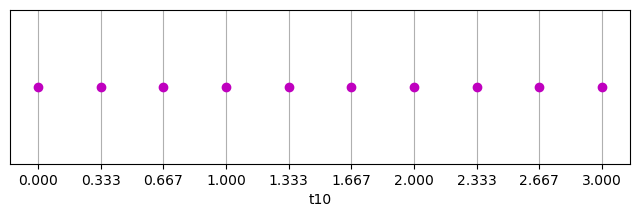

In [4]:
# Run this cell to see a visualization of your `t10` array.
# Feel free to experiment; this cell is not graded.
plt.figure(figsize=(8,2))
plt.plot(t10,np.full(t10.shape[0],0),'mo')
plt.xlabel('t10')
plt.xticks(t10)
plt.yticks([])
plt.grid()

In [5]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2 -- Coarse positions

Evaluate the formula for $x(t)$ with `t10` in place of $t$. This will produce a NumPy array which you should call `x_t10`.

**Hint**: Rember to use the NumPy versions of the exponential and cosine functions: [np.exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) and [np.cos](https://numpy.org/doc/stable/reference/generated/numpy.cos.html).

In [6]:
x0 = 0.01    # meters
omega = 200  # rad/sec
a = 1        # 1/sec

x_t10 = x0*np.exp(-a*t10)*np.cos(omega*t10)

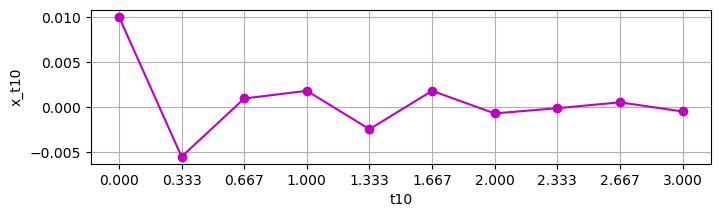

In [7]:
# Run this cell to see a visualization of your `x_t10` array.
# Feel free to experiment; this cell is not graded.
plt.figure(figsize=(8,2))
plt.plot(t10,x_t10,'-mo')
plt.xlabel('t10')
plt.ylabel('x_t10')
plt.xticks(t10)
plt.grid()

In [8]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Question 1.3 -- Do the same on a fine grid

Repeat parts 1.1 and 1.2, but this time use a grid with 1000 points instead of 10, and store the time and position arrays as `t1000` and `x_t1000` respectively. The starting and ending times are still 0 and 3. 

In [9]:
t1000 = np.linspace(0,3,1000)
x_t1000 = x0*np.exp(-a*t1000)*np.cos(omega*t1000)

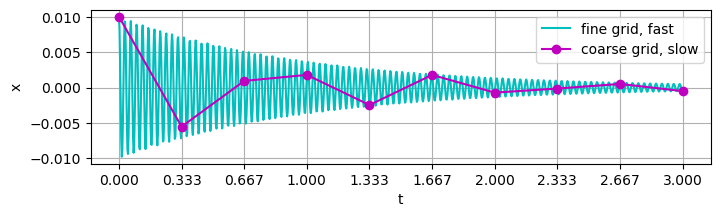

In [10]:
# Run this cell to see a visualization of the function on both the coarse and fine grids.
# Feel free to experiment; this cell is not graded.
plt.figure(figsize=(8,2))
plt.plot(t1000,x_t1000,'c-',label='fine grid, fast')
plt.plot(t10,x_t10,'-mo',label='coarse grid, slow')
plt.xlabel('t')
plt.ylabel('x')
plt.xticks(t10)
plt.legend()
plt.grid()

In [11]:
grader.check("q1p3")

q1p3 results: All test cases passed!

**Reflection**. We can think of these arrays as *samples* of the system collected at slow and fast rates. The coarse grid represents a slow sampling rate of 10 samples per 3 seconds, which can be written as 3.33 $s^{-1}$. The fine grid is a fast sampling rate of 333 $s^{-1}$. Notice in the plot that the the fast sampler captures the high frequency of the vibration, but this is missed by the slow sampler. 

# Question 2 -- Settling time

How long will it take for the rod to stop moving? 

We can see from the previous plot that the vibration dissipates, and thus we infer that the rod will eventually  stop moving. But, strictly speaking, the exponential term $e^{-at}$ "tends to zero asymptotically", but never reaches absolute rest. To answer the question of when the rod will stop moving, we must define our terms carefully. 

We will use the total energy $E$ of the rod as a proxy for movement. $E$ is the sum of the rod's potential and kinetic energies. Its formula is given below (without proof).

$$ E = \frac{1}{2}m \:x_0^2 \: (\omega^2 - a^2) \:e^{-2at} $$

$m$ is the mass of the rod, which we assume to be 0.8 Kg. We will say that the rod is *motionless* if its energy is less than a threshold value $\tau$ which we take to be $10^{-4}$ joules (the SI unit of energy). 

Your task is to find the settling time `Ts` of the rod, which is defined as the earliest time that the rod is motionless. We will compute this in several steps.

## Question 2.1: Time array

As before, we must first build a time array. The settling time will turn out to be greater than 3 but smaller than 6 seconds. Hence we will use a time array ranging from 0 to 6 seconds. 

We'll choose the same sampling rate as we did in question 1.3, ie $\frac{1000}{3}s^{-1}$. This is equivalent to a sampling time *interval* of $\frac{3}{1000}=0.003$ seconds.

Use [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) to generate the time array just described. Call it `time`. 

**Note**: The final time instant of 6 seconds should *not* be included in the array.

In [12]:
time = np.arange(0,6,0.003)

In [13]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Question 2.2 -- Total energy

Evaluate the total energy of the rod for values in the `time` array. Store the result as the variable `E`. 

In [14]:
m=0.8
E = 0.5*m*x0**2*(omega**2-a**2)*np.exp(-2*a*time)

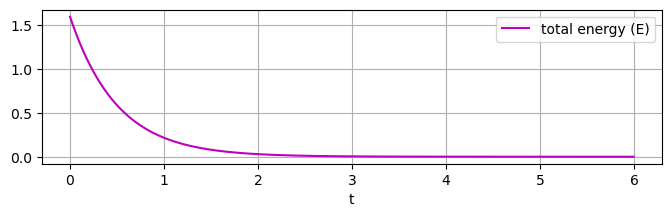

In [15]:
# Run this cell to see a plot of the total energy
plt.figure(figsize=(8,2))
plt.plot(time,E,'m-',label='total energy (E)')
plt.xlabel('t')
plt.legend()
plt.grid()

In [16]:
grader.check("q2p2")

q2p2 results: All test cases passed!

## Question 2.3 -- Boolean indicator

Create a boolean array called `rod_stopped` indicating times where the energy of the rod is less than $\tau=10^{-4}$ joules. 

In [17]:
tau=1e-4

rod_stopped = E < tau

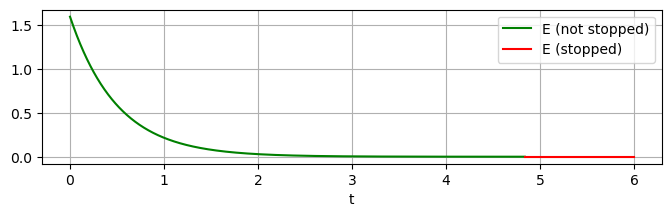

In [18]:
# Run this cell to see a plot of the total energy
plt.figure(figsize=(8,2))
plt.plot(time[~rod_stopped],E[~rod_stopped],'g-',label='E (not stopped)')
plt.plot(time[rod_stopped],E[rod_stopped],'r-',label='E (stopped)')
plt.xlabel('t')
plt.legend()
plt.grid()

In [19]:
grader.check("q2p3")

q2p3 results: All test cases passed!

## Question 2.4 -- Settling time

Define the settling time `Ts` (in seconds) as the earliest value of `time` when the `rod_stopped` condition is `True`.

**Hint** [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html), [np.min](https://numpy.org/doc/stable/reference/generated/numpy.min.html)

In [20]:
Ts = time[np.min(np.where(rod_stopped))]

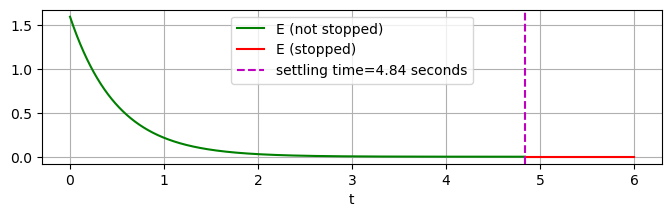

In [21]:
# Run this cell to see a plot of the total energy
plt.figure(figsize=(8,2))
plt.plot(time[~rod_stopped],E[~rod_stopped],'g-',label='E (not stopped)')
plt.plot(time[rod_stopped],E[rod_stopped],'r-',label='E (stopped)')
plt.axvline(Ts,color='m',linestyle='--',label=f'settling time={round(Ts,2)} seconds')
plt.xlabel('t')
plt.legend()
plt.grid()

In [22]:
grader.check("q2p4")

q2p4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [23]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)